# The Disparity in The Mean Working Hours per Week for Individuals from Economically Developed Countries (EDC) Versus Less Economic Developed Countries (LEDC)

## Introduction

Countries are often categorized as More Economically Developed Countries or Economically Developed Countries (EDC) or Less Economically Developed Countries (LEDC) based on their factors of economic development. However, other than economic development factors, a substantial variety of differences are often observed between individuals from these two categories, work culture being one of them.(Olaniran, Bolanle A., and Mary F. Agnello) A reflection of the work culture, in this context, can be observed through the amount of time spent working per week.(Boeckmann, Irene, et al.)

The number of hours each week that an individual spends working on a commercial activity in a typical week is defined by the term hours per week. The working hours per week of an individual is amortized, or averaged over a long period, to take into account working over-time and unscheduled shifts. This project proposes to compare this attribute, and to explore this idea by estimating the mean working hours for The United States of America, a country categorized as EDC, and India, a country categorized as LEDC.
Question: What is the disparity in the mean working hours per week for individuals from the United States and India?

To assess this, we will be using the “Census Income Data Set dataset” found on the UCI ML Repository. This Dataset is a mined sample from the 1994 Census database.(Kohavi, Ronny, and Barry Becker.) The Dataset presents a variety of attributes such as age, education, marital-status; moreover, it includes attributes of our interest such as native country and the hours worked per week. 

## Preliminary Results

### Importing Modules

In [3]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(datateachr)

### Downloading Dataset

In [20]:
adult <- read_csv("https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv")
head(adult)


── Column specification ────────────────────────────────────────────────────────
cols(
  Age = col_double(),
  workclass = col_character(),
  fnlwgt = col_double(),
  education = col_character(),
  `education-num` = col_double(),
  `marital-status` = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  `capital-gain` = col_double(),
  `capital-loss` = col_double(),
  `hours-per-week` = col_double(),
  `native-country` = col_character()
)


Warning message:
“32561 parsing failures.
row col   expected     actual                                                               file
  1  -- 14 columns 15 columns 'https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv'
  2  -- 14 columns 15 columns 'https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv'
  3  -- 14 columns 15 columns 'https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv'
  4  -- 14 columns 15 columns 'https://raw

Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


*Figure 1.1: Original Adult Dataset*

### Wrangling and Tidying the Dataset

In [37]:
#Creating R accessible column names for the dataset
colnames(adult) <- c('age', 'workclass', 'fnlwgt', 'education', 'education_num',
                     'maritial_status', 'occupation', 'relationship', 'race', 'sex',
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country')

#Selecting interested variables in the dataset
hours <- adult %>%
    select(hours_per_week, native_country) %>%
    filter(native_country == "United-States" | native_country == "India") %>% 
    mutate(native_country = as_factor(native_country)) %>%
    na.omit()
head(hours)

hours_per_week,native_country
<dbl>,<fct>
40,United-States
13,United-States
40,United-States
40,United-States
40,United-States
45,United-States


*Figure 1.2: Hours Dataset with Interested Variables, Hours Worked Per Week and the Native Country United States and India. Ensured dataset does not contain any missing or invalid values.*

The wrangled and tidied dataset contains the following variables:
- hours_per_week: The number of hours an individual in the sample worked per week
- native_country: The individual's birth country

Our dataset contains our random variable, the hours an individual works per week, which spreads across the native country category which consist of the categories United States and India. The catergories were chosen to focus on the differences of our random variable with individuals from a developed and a developing country. 

In [95]:
#Printing numbers of rows related to the dataset
cat("Number of instances in the wrangled and tidied dataset: ", nrow(hours), "\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from United \nStates: ",
    nrow(filter(hours, native_country == "United-States")), "\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from India: ",
    nrow(filter(hours, native_country == "India")), '\n')

Number of instances in the wrangled and tidied dataset:  29270 
Number of instances retaining information regarding hours worked per week for Individuals from United 
States:  29170 
Number of instances retaining information regarding hours worked per week for Individuals from India:  100 


### Random Variable Distribution

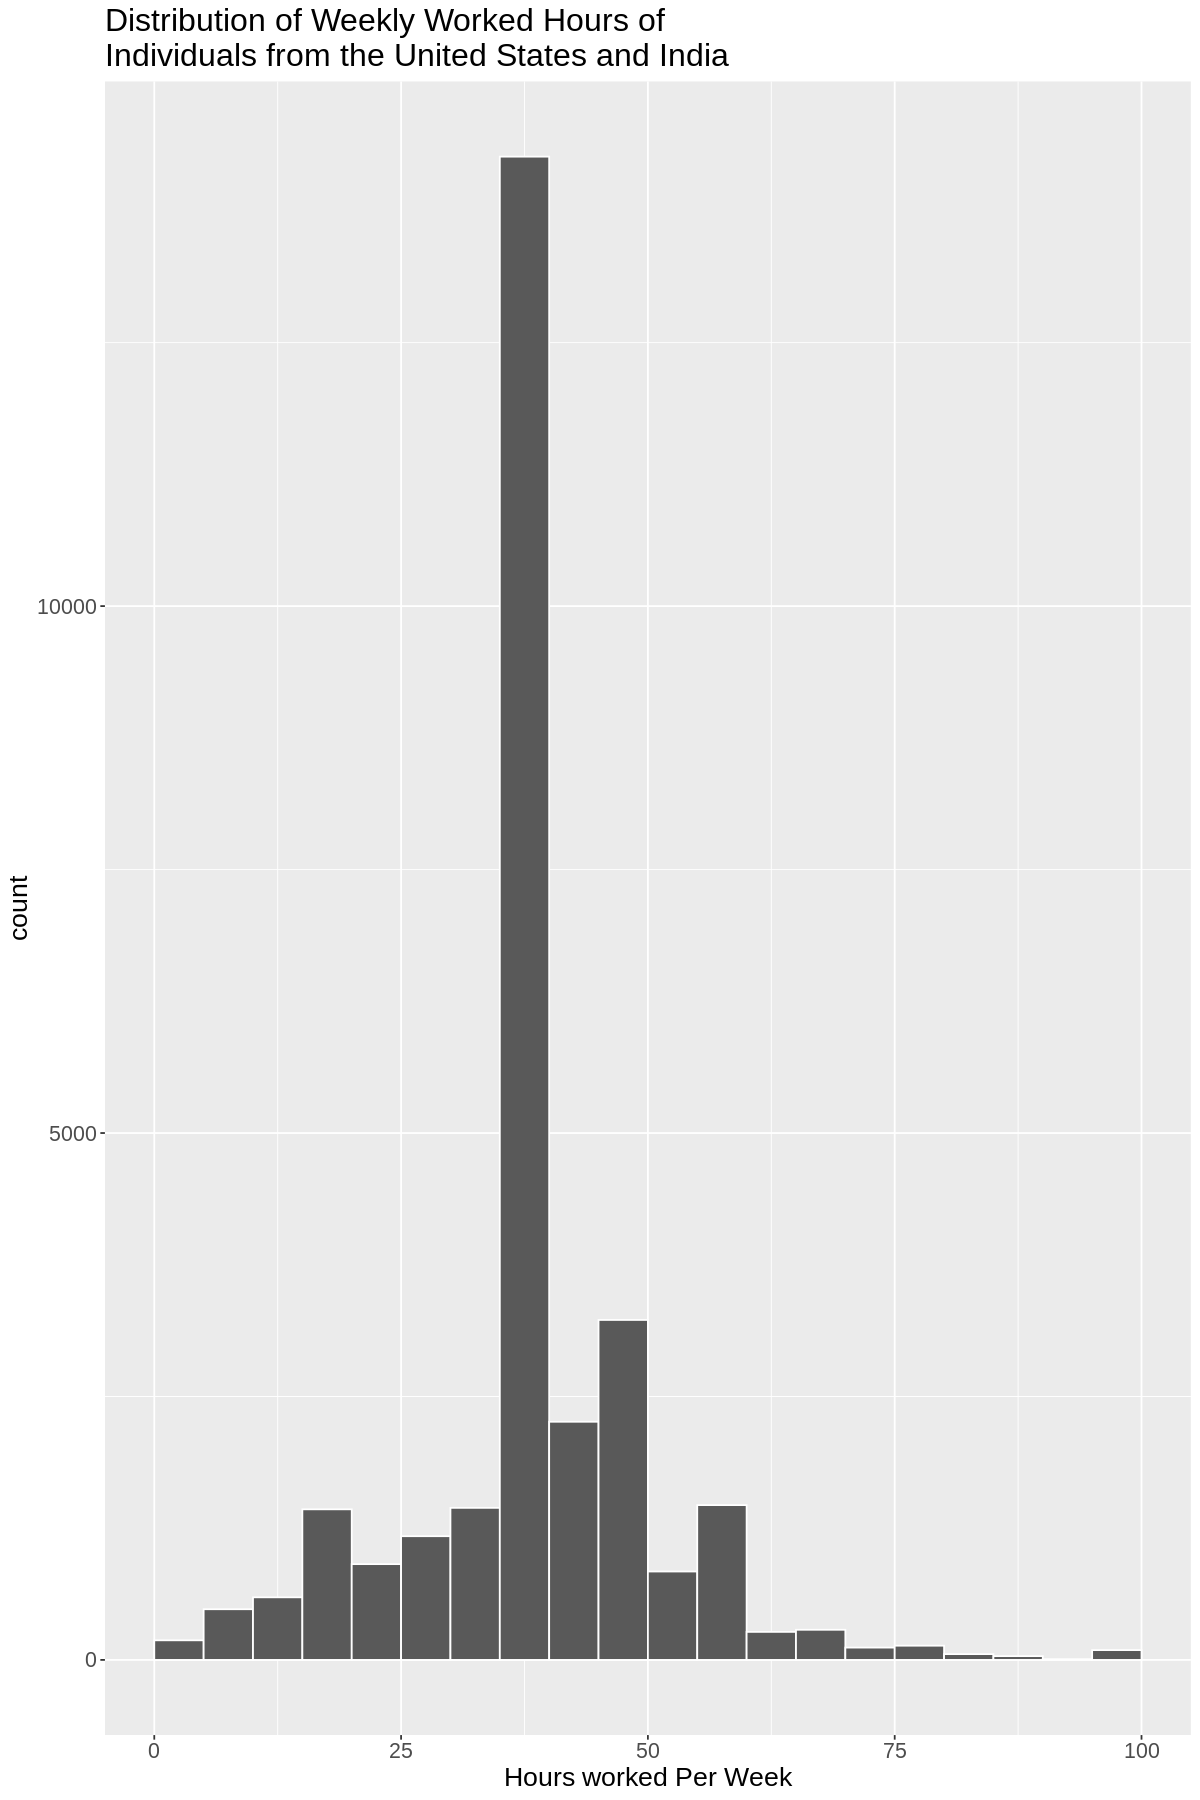

In [93]:
#Histogram to Visualize Random Variable's Distribution
options(repr.plot.width = 10, repr.plot.height = 15)
hours_plot <- hours %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5, boundary = 0, colour = 'white') +
    labs(title = "Distribution of Weekly Worked Hours of \nIndividuals from the United States and India",
        x = "Hours worked Per Week") +
    theme(text = element_text(size = 16))
hours_plot

*Figure 1.3: Histrogram Displaying Distribution of the Random Variable, Hours Worked per Week*

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 15)
#Histogram to Visualize Random Variable's Distribution Specific to United States Category
hours_usa_plot <- hours %>% 
    filter(native_country == "United-States") %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5, boundary = 0, colour = 'white') +
    labs(title = "Distribution of Weekly Worked Hours from Individuals from the \nUnited States",
        x = "Hours worked Per Week") +
    theme(text = element_text(size = 16))

#Histogram to Visualize Random Variable's Distribution Specific to India Category
hours_india_plot <- hours %>% 
    filter(native_country == "India") %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5, boundary = 0, colour = 'white') +
    labs(title = "Distribution of Weekly Worked Hours from Individuals from \nIndia",
        x = "Hours worked Per Week") +
    theme(text = element_text(size = 16))

plot_grid(hours_usa_plot, hours_india_plot)

*Figure 1.4: Side by Side Histograms Comparison of the Distribution of Hours Worked Per Week for Individuals from United States and from India*

### Categorical Comparison 

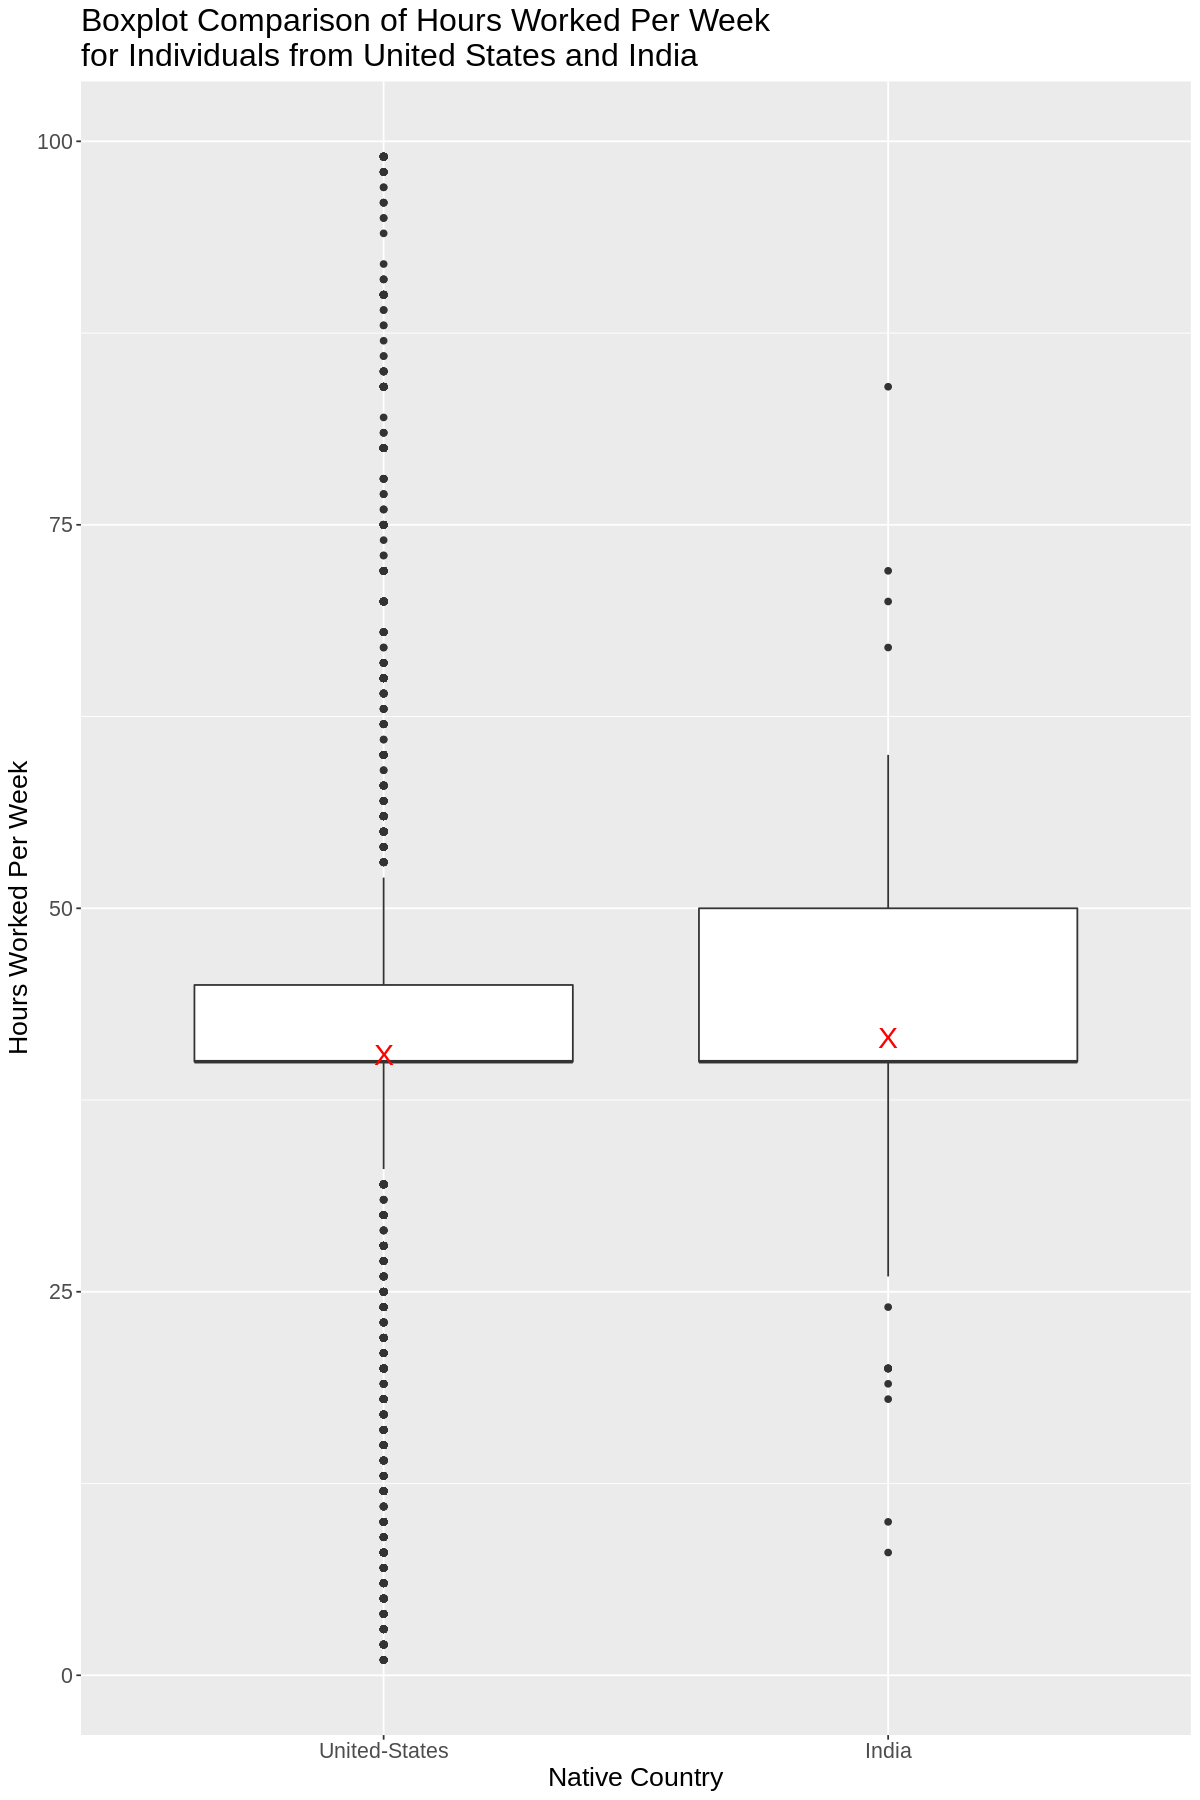

In [100]:
#Boxplot to Visualize Disparities
options(repr.plot.width = 10, repr.plot.height = 15)
boxplot <- hours %>%
    ggplot(aes(x = native_country, y = hours_per_week)) + 
    geom_boxplot() +
    labs(title = "Boxplot Comparison of Hours Worked Per Week \nfor Individuals from United States and India",
        x = "Native Country",
        y = "Hours Worked Per Week") +
    theme(text = element_text(size = 16))
boxplot + stat_summary(fun=mean, geom="point", shape = "X", size=6, colour = "red")

*Figure 1.5: Boxplot Displaying Spread of Hours Worked Per Week for Individuals from United States compared to India. The Red X Marks the Mean Hours Per Week For Each Native Country.*

### Preliminary Estimates

In [101]:
#Computing parameter estimates and displaying within a tibble
estimates <- hours %>%
    group_by(native_country) %>%
    summarize(mean = mean(hours_per_week), 
             standard_deviation = sd(hours_per_week))
estimates

,native_country,mean,standard_deviation
,<fct>,<dbl>,<dbl>
1,United-States,40.44775,12.41720
2,India,41.53000,12.29556


*Figure 1.6: Tibble with Estimates of Mean and Standard Deviation of the Hours Worked Per Week for Individuals from the United States and India*

## Methods: Plan

We first acknowledge that our dataset “Adult.csv” is a smaller sample of the census taken in 1994. The dataset has been cited by various peer-reviewed academic journals, making it prime for statistical exploration. 

From the side-by-side histogram (Figure 1.4), we notice that both the histograms are relatively bell-shaped with comparable centers. As our dataset is a sample of a whole population, we do not have access to a sampling distribution; therefore, it would be beneficial to take a bootstrap sample for further analysis such as estimating the mean parameters, computing a confidence interval, and carrying out hypothesis testing. Further, it might be helpful to compare this with the asymptotic methods.

From the side-by-side box plots (Figure 1.5), we see that there are more outliers for the number of hours worked per week by individuals from the US compared to their Indian counterparts, which has more observations closer to its median. This indicates that the standard deviation of the hours_per_week for individuals from the US will be greater than the hours_per_week for individuals from India. Both the boxplots appear to have roughly the same median, which is closely alligned to Q1, the 25th percentile. Again, hinting that our means (a measure of the center) will be significantly close but not necessarily equal.

The initial inferences made by the box plot are confirmed by the point estimates of the mean and standard deviation (Figure 1.6). Our means are close but not equal, and the standard deviation for individuals from the US is greater, as predicted. Additionally, the point estimate for the mean working hours per week for individuals natively from India is greater than the point estimate for the US, which overlaps with the findings of Azhar, et al, suggesting longer working hours are often observed in India due to its overworking culture. (Azhar, Gulrez S et al) But are these results conclusive enough to prove that individuals natively from India on an average work longer hours than their US counterparts? To explore this we will further analyze our data through different methods and perform hypothesis testing.

**What do we expect to find?**

We expect to find: whether there is any significant difference in the average working hours per week for individuals from the US versus India.

**What impact could such findings have?**

Our findings could help initiate further research in work-culture differences between LEDCs and EDCs and contributing factors that lead to it.

**What future questions could this lead to?**
-         What is the disparity in the average working hours per week in all EDCs and LEDCs?
-         What are the factors that contribute to the difference/similarity in the average working hours per week in the US and India? Are these differences comparable to the pre-globalization period?
-         What other factors contribute to making a work culture observed in economically developed countries? Will implementing a similar work culture elsewhere change its productivity level?


## References

- Azhar, Gulrez S et al. “Overwork Among Residents in India: A Medical Resident's Perspective.” Journal of family medicine and primary care vol. 1,2 (2012): 141-3. doi:10.4103/2249-4863.104986
- Boeckmann, Irene, et al. “Cultural and Institutional Factors Shaping Mothers' Employment and Working Hours in Postindustrial Countries.” OUP Academic, Oxford University Press, 8 Dec. 2014, https://academic.oup.com/sf/article-abstract/93/4/1301/2332153.
- Kohavi, Ronny, and Barry Becker. “Census Income Data Set.” UCI Machine Learning Repository: Census Income Data Set, https://archive.ics.uci.edu/ml/datasets/Census+Income. 
- Olaniran, Bolanle A., and Mary F. Agnello. “Globalization, Educational Hegemony, and Higher Education.” Multicultural Education & Technology Journal, Emerald Group Publishing Limited, 13 June 2008, https://www.emerald.com/insight/content/doi/10.1108/17504970810883351/full/html?casa_token=ntVIsuBDe14AAAAA%3Ac1IXCE1dZcOwsHtVagfsGRKFVb1OQjKBW23dUNOrwriVz1P3Z79x9wLX49N7a7s5J19ThZS7PkzzDQsCVdgw6A6S4MnbcWdnMilgQSxWQ2U_v3dPmWrmzg. 
